### ДЗ №1
Распознать изображение с игральными картами и вывести изображение и номинал каждой карты

#### 1. Прочитайте изображение из файла и выведите его на экран:

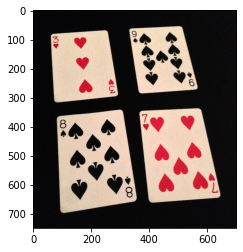

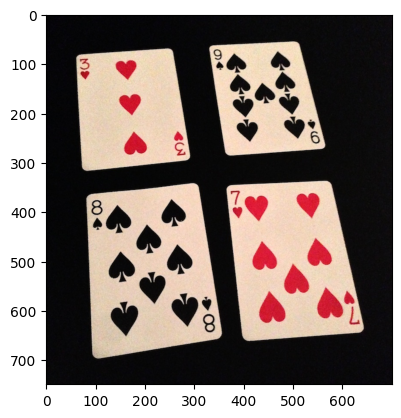

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

img = imread('cards.png')

plt.imshow(img)
plt.show()

#### 2. Выполните последовательно 2 преобразования: переведите изображение в оттенки серого (COLOR_BGR2GRAY) и примените размытие (GaussianBlur):

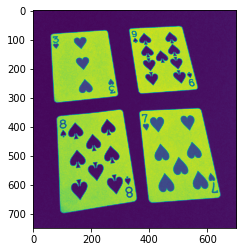

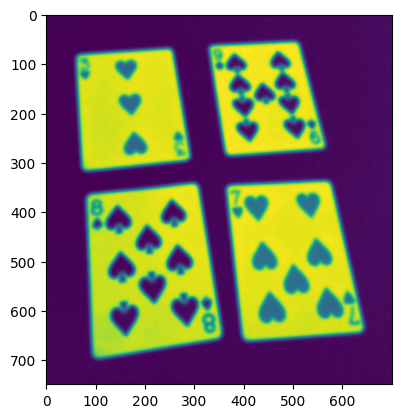

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (21, 21), 0)
plt.imshow(blur)
plt.show()

#### 3. Найдите 4 контура максимального размера и выведите их на исходном изображении:

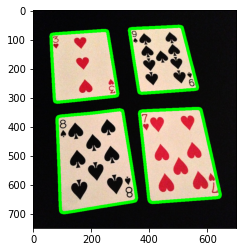

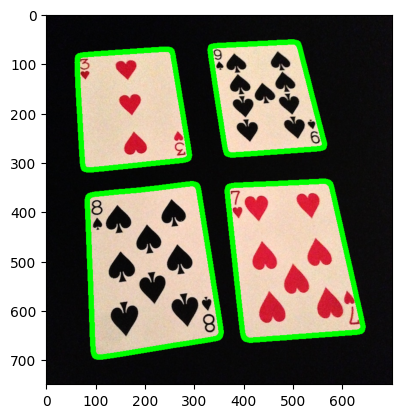

In [3]:
numcards = 4

flag, thresh = cv2.threshold(blur, 128, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:numcards]

contours_img = img.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)  
plt.imshow(contours_img)
plt.show()

#### 4. Примените к каждому контуру проективное преобразование и выведите отдельным изображением: 

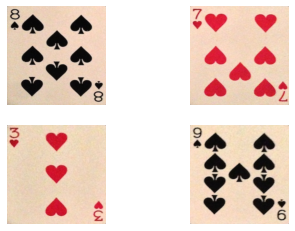

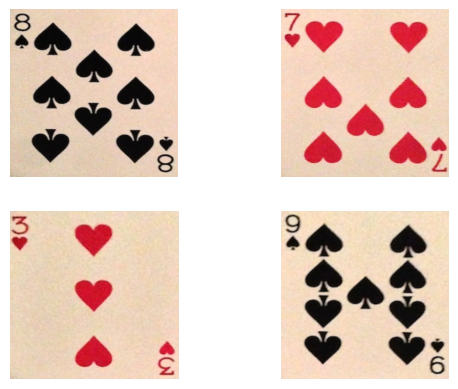

In [4]:
warps = []

for i in range(numcards):
    card = contours[i]
    peri = cv2.arcLength(card,True)
    approx = np.array(cv2.approxPolyDP(card,0.02*peri,True), np.float32)
    rect = cv2.minAreaRect(contours[2])
    r = cv2.boxPoints(rect)
    h = np.array([[0,0],[450,0],[450,450],[0,450]], np.float32)
    transform = cv2.getPerspectiveTransform(approx,h)
    warp = cv2.warpPerspective(img,transform,(450,450))[:,::-1]
    plt.subplot(2,2,i+1); plt.axis('off')   
    plt.imshow(warp)
    warps.append(warp)

plt.show()

#### 5. Найдите количество символов на одной карте:
- на изображении карты найдите все контуры;
- найдите максимальный контур (не совпадающий с самой картой);
- найдите другие контуры, отличающиеся от максимального по размеру не более 10%;
- посчитайте количество максимальных контуров.

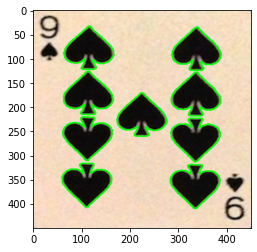

9


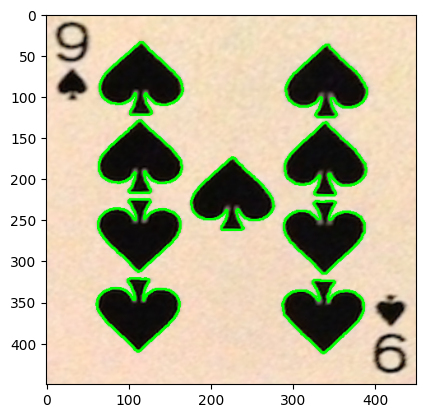

In [5]:
warps_with_num = []

for warp in warps:
  img_gray = cv2.cvtColor(warp,cv2.COLOR_RGB2GRAY)
  warp_contours_img = warp.copy()

  flag, thresh = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)

  main_contours = []
  main_area = 0
  for contour in contours:
    if cv2.contourArea(contour) > .9*warp.shape[0]*warp.shape[1]: continue
    if main_area == 0:
      main_contours.append(contour)
      main_area = cv2.contourArea(contour)
    else:
      if cv2.contourArea(contour) - main_area > -main_area * .1:
        main_contours.append(contour)

  cv2.drawContours(warp_contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)
  warps_with_num.append({ 'warp': warp_contours_img, 'num': len(main_contours) })

print(len(main_contours))
plt.imshow(warp_contours_img)
plt.show()

#### 6. Соберите все предыдущие команды в один код, чтобы на выходе получилось следующее изображение:

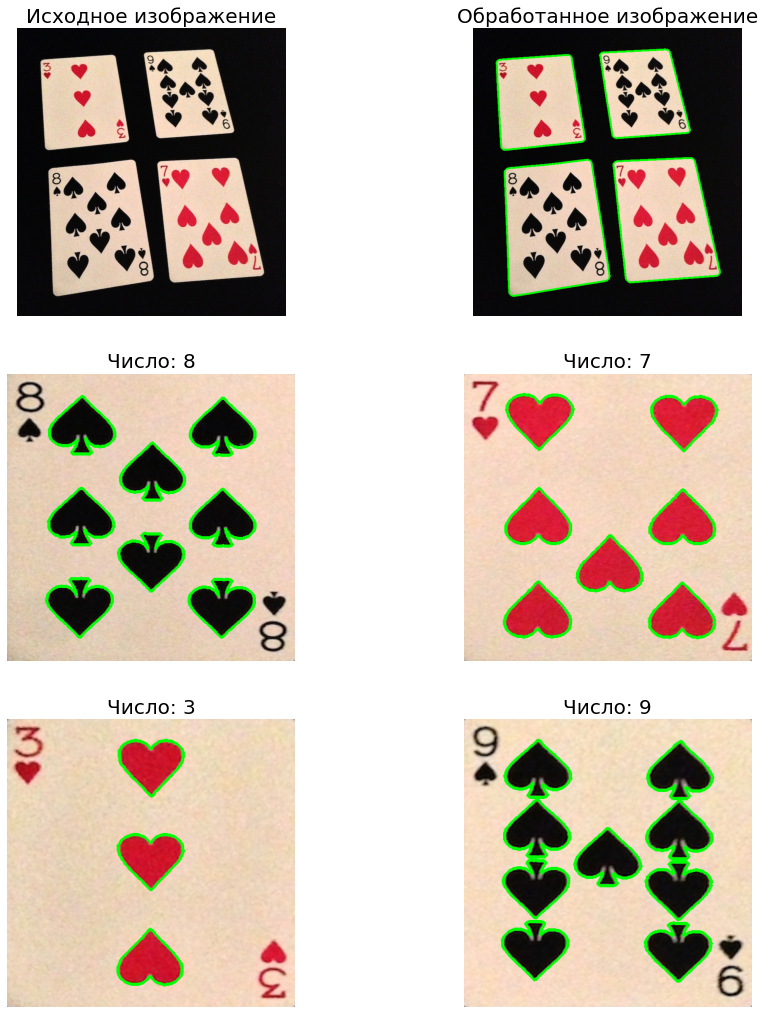

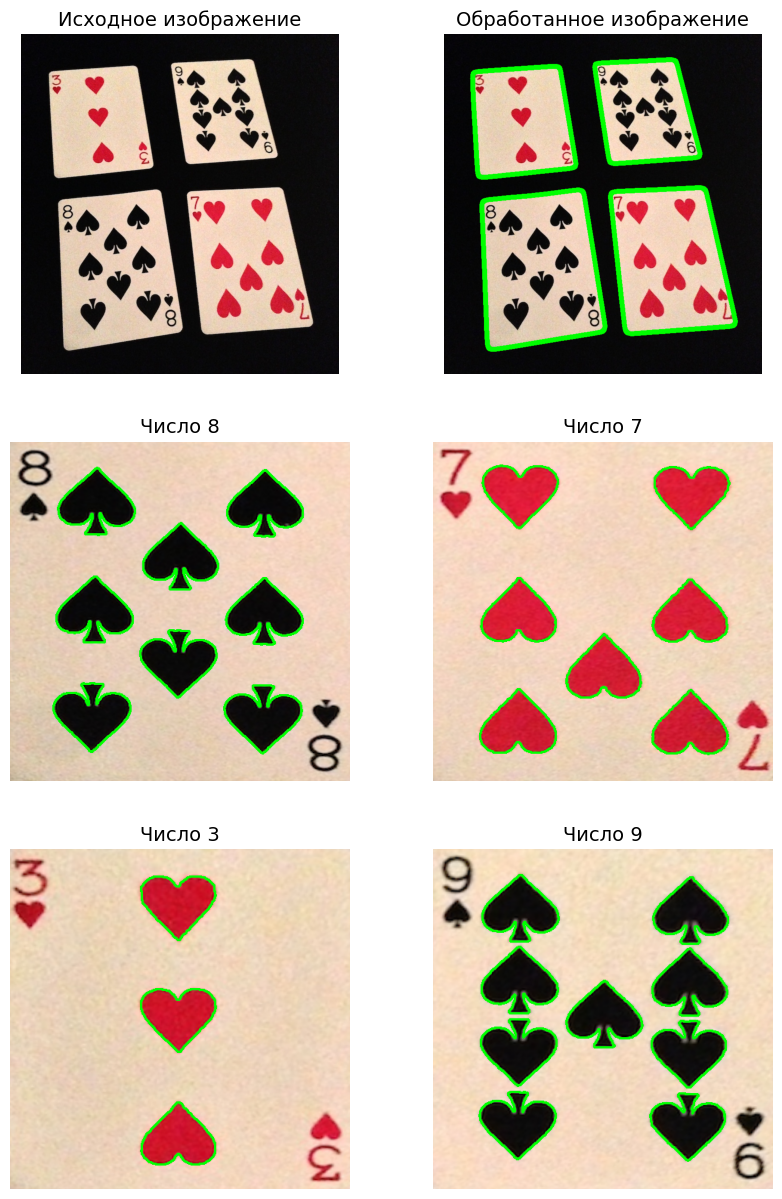

In [6]:
font_size = 14

plt.figure(figsize=(10, 15))
columns = 2
rows = 3

plt.subplot(rows, columns, 1).set_title('Исходное изображение', fontsize=font_size); plt.axis('off')
plt.imshow(img)

plt.subplot(rows, columns, 2).set_title('Обработанное изображение', fontsize=font_size); plt.axis('off')
plt.imshow(contours_img)

for i in range(numcards):
  warp_with_num = warps_with_num[i]
  warp = warp_with_num['warp']
  num = warp_with_num['num']
  plt.subplot(rows, columns, 3 + i).set_title(f'Число {num}', fontsize=font_size); plt.axis('off')
  plt.imshow(warp)

plt.show()